# En analyse av ngrammer

Det her er en oppstartsnotebook som skal gjøre deg kjent med funksjonaliteten, hvordan celler endres og hvordan en hypotese kan undersøkes med kvantitative data.  Temaet er kjønn og Beauvoirs tese om at kvinnen er sekundær, etter mannen, i vestlig kultur, og at kvinnen er knyttet mer til passive egenskaper, mens mannen er en agens. 

Måten vi undersøker hypotesen med tallmateriale er å se hva som sies om menn og kvinner, og et sted å starte er å telle pronomener. Metodikken er knyttet til relativ forekomst av ord og uttrykk sammen med de norske kjønnede pronomene *han* og *hun*.

## Kommandoene som skal benyttes ligger i modulen *nbtext*

In [2]:
import nbtext as nb
from nbtext import difference
%matplotlib inline

### Henter data fra ngram-basen

Bruk kommandoen *nb_ngram()* for hente ngrammer, det som står mellom ' ' eller " " er det samme som skrives i versjonen på [web](https://www.nb.no/sp_tjenester/beta/ngram_1/trends#ngram/query?terms=i%2C+p%C3%A5&lang=all&case_sens=0&freq=rel&corpus=bok).

In [3]:
pron = nb.nb_ngram('han, hun', years = (1980, 2000), smooth=1, corpus='bok')
pron

,han,hun
1980,0.560826,0.184280
1981,0.528530,0.178862
1982,0.508471,0.189271
1983,0.475342,0.186673
1984,0.457172,0.162887
1985,0.546739,0.211806
1986,0.466456,0.208164
1987,0.501457,0.202460
1988,0.484661,0.204572
1989,0.450755,0.174308


## Resultatet er en dataramme

Datarammer brukes flittig i alt fra ngrammer til tekstanalyse. Matrisene er en måte å representere kvantitative språklige data. Ikke så ulikt det noen kan være vant med fra excel-ark.

Når en navn er knyttet til data, er det bare å skrive navnet i en celle for å se verdien, som gjort ovenfor. Vil du se et plot skriver du plot() bak variabelen.

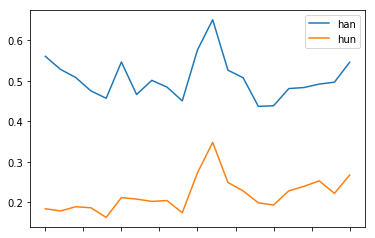

In [4]:
pron.plot()

Grafen viser tydelig at *han* forekommer oftere enn *hun*. Gir det et trygt grunnlag for å hevde at Beauvoir hadde rett? Vel, vi kan si så mye at det er rimelig å anta at det refereres mer til menn enn kvinner i norske bøker, og at det er en trend som holder seg godt over tid. Så på et nivå i kulturen følger kvinner etter menn. Dataene tar oss ikke til alle avkroker.

Prøv en tilsvarende analyse med aviskorpuset.

Kolonnene i en dataramme kan summeres for å sammenligne forskjeller.

In [5]:
pron.mean()['han']/pron.mean()['hun']

2.3055829166005148

In [6]:
nb.frame(pron.mean(), 'sum')

,sum
han,0.505651
hun,0.219316


## Men hva med analyse og del to av Beauvoirs tese? 

Dataene i rammen *pron* kan divideres og ganges for å frem forskjeller. La oss se litt på det og undersøke forskjeller mellom maskuling og feminine referanser med utgangspunkt i forholdstallene over en periode. 

Utgangspunktet er forholdstallet mellom han og hun, skrevet som han/hun = 2.3. Det betyr at alle kontekster som har han i seg skal være omtrent 2.3 ganger høyere enn tilsvarende med hun. Er forskjellen større enn 2.3 er konteksten mer mannlig, tilsvarende kvinnelig om den er under 2.3. Utregningen er sånn at han/hun er grunnlinjen, slik at varianter som er høyere enn 1 trekker mot det mannlige, og under 1 mot det kvinnelige.

For å sjekke forksjeller er det en kommando *difference()* som sjekker forholdet mellom 4 størrelser, de to siste vil i de første tilfellene var forholdet mellom *han* og *hun*. De to første er de som skal testes. Maskulin kontekst først, deretter feminin.



In [7]:
difference('ham', 'henne', 'han','hun')

0.61843806809010804

In [8]:
difference('hans', 'hennes', 'han', 'hun')

1.2200543525365617

Det to siste gir støtte til del to av Beauvoirs tese. Dataene for ham/henne tyder på at hunkjønnspronomen er overrepresentert som objekt (men sjekk muligheten for at han også kan være objekt), og objekter er assosiert med det passive.

## Sjekk bigramkontekster

Hvilke verb går sammen med pronomenene?

In [9]:
nb.difference('han mener', 'hun mener', 'han', 'hun')

1.3381903819227337

In [10]:
nb.difference('han føler', 'hun føler', 'han', 'hun')

0.58222318164442544

In [11]:
nb.difference('han gråter', 'hun gråter', 'han', 'hun')

0.24425557325619277

## Test andre kontekster ved hjelp av *difference()*

Husk at de to siste ordene danner basisforholdet, så om vi skriver

    difference(t1, t2, r1, r2,..)
    
Så er uttrykket som regnes ut relativt til r1/r2 - i sin helhet (t1/t2)/(r1/r2). Tall over 1 heller mot det som uttrykkes i r1, tall under 1 går mot r2.

In [12]:
nb.difference('rike menn', 'rike kvinner', 'menn', 'kvinner')

3.9150311882029563

In [13]:
nb.difference('fattige menn', 'fattige kvinner', 'menn', 'kvinner')

0.28210767687060939

In [14]:
nb.difference('smarte menn', 'smarte kvinner', 'menn', 'kvinner')

'Mangler noen data - har bare for: smarte kvinner, menn, kvinner'

# Oppgave

Repeter øvelsen med avisdata

In [ ]:
nb.nb_ngram('han, hun', corpus='avis', years=(1980,2000),smooth=1).plot()